In [18]:
from Bio import AlignIO
import yaml
%matplotlib inline
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
sns.set_context("notebook", font_scale=1.50)
sns.set_style("ticks")

In [ ]:
aln = AlignIO.read(open("knownGenesFullLen.aln"), format="clustal")
to_remove = """MHCI_EXON1-N00401
MHCI_EXON3-N00401
MHCI_EXON4-N00401
MHCI_EXON8-N00401
MHCI_EXON6-N00401
MHCI_EXON7-N00401
MHCI_EXON5-N00401
MHCI_EXON2-N00401
Rev1
For3
For1
Rev2
MHCI_CODING_SEQUENCE-N00401""".split("\n")

In [ ]:
aln_length = aln.get_alignment_length()
from operator import itemgetter
from collections import Counter
score_dict = {}
for i in range(aln_length):
    score_dict[i] = Counter(map(itemgetter(i), [j.seq for j in list(aln) if not j.id in to_remove])) 

In [ ]:
import yaml
yaml.dump(score_dict, open("knownGenesFullLen.aln.yaml", "w"))

In [2]:
score = yaml.load(open("knownGenesFullLen.aln.yaml"))

In [3]:
score_df = pd.DataFrame.from_dict(score).T.fillna(0)

In [4]:
from matplotlib.ticker import MultipleLocator

In [5]:
# pd.options.display.max_rows = 1600
def plot_this(score_df, start=None, end=None, primer='For1'):
    matplotlib.pyplot.figure()
    ax = score_df.drop('-', axis=1).max(axis=1)[start:end].plot(kind='bar', color='dodgerblue', 
                                                           edgecolor='none', alpha=0.5,
                                                      width=1, linewidth=0, figsize=(25, 1.5))
#     _ = ax.set_xticklabels([])
    _ = ax.set_yticklabels([])
#     _ = ax.set_xticklabels(range(start+1, end+2, 10), rotation=0)
    ax.xaxis.set_major_locator(MultipleLocator(50))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    print(start, end)
    _ = ax.set_xticklabels(range(start-50, end+1, 50), rotation=0)
    _ = ax.xaxis.set_ticks_position('top') 
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(right='off', left='off')

31 631
631 1231


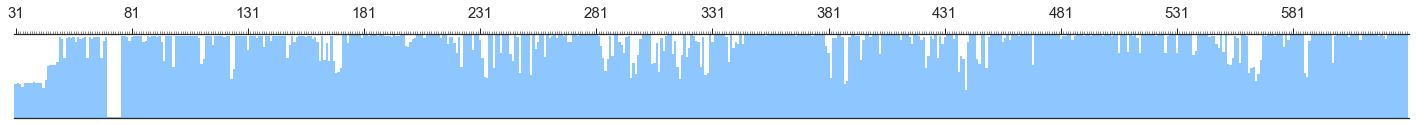

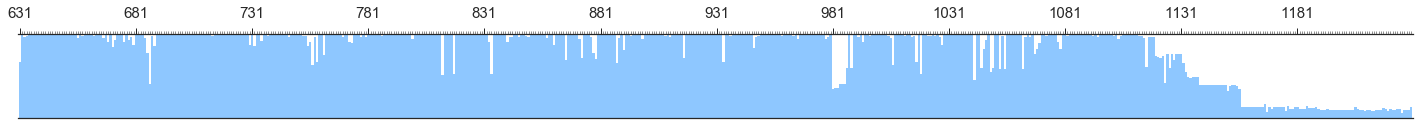

In [6]:
for i in range(31, 1116, 600):
    plot_this(score_df, start=i, end=i+600)

for3 266-282
for1 173-190
rev2 569-587
rev1 601-619

In [21]:
# pd.options.display.max_rows = 1600
def plot_color(ax, score_df, start=None, end=None, primer='For1', 
               arrow=False, text=None, a_s=None, l_e=None,
               both_arrows=False, text1=None, text2=None, 
               a_s1=None, a_s2=None, l_e1=None, l_e2=None):
    temp = pd.DataFrame(score_df.drop('-', axis=1).max(axis=1)[start:end], columns=['value'])
    temp['set1'] = 0
    temp['set2'] = 0
    temp['exon1'] = 0
    temp.loc[31:100, 'exon1'] = temp.loc[31:100, 'value']
    temp.loc[31:100, 'value'] = 0
    temp.loc[101:171, 'exon2a'] = temp.loc[101:171, 'value']
    temp.loc[101:171, 'value'] = 0
    temp.loc[172:189, 'set1'] = temp.loc[172:189, 'value']
    temp.loc[172:189, 'value'] = 0
    temp.loc[190:264, 'exon2b'] = temp.loc[190:264, 'value']
    temp.loc[190:264, 'value'] = 0
    temp.loc[265:281, 'set2'] = temp.loc[265:281, 'value']
    temp.loc[265:281, 'value'] = 0
    temp.loc[282:370, 'exon2c'] = temp.loc[282:370, 'value']
    temp.loc[282:370, 'value'] = 0
    temp.loc[371:567, 'exon3a'] = temp.loc[371:567, 'value']
    temp.loc[371:567, 'value'] = 0
    temp.loc[567:586, 'set1'] = temp.loc[568:586, 'value']
    temp.loc[567:586, 'value'] = 0
    temp.loc[587:600, 'exon3b'] = temp.loc[587:600, 'value']
    temp.loc[587:600, 'value'] = 0
    temp.loc[600:618, 'set2'] = temp.loc[600:618, 'value']
    temp.loc[600:618, 'value'] = 0 
    temp.loc[619:646, 'exon3c'] = temp.loc[619:646, 'value']
    temp.loc[619:646, 'value'] = 0
    temp.loc[647:922, 'exon4'] = temp.loc[647:922, 'value']
    temp.loc[647:922, 'value'] = 0
    temp.loc[923:1033, 'exon5'] = temp.loc[923:1033, 'value']
    temp.loc[923:1033, 'value'] = 0
    temp.loc[1034:1066, 'exon6'] = temp.loc[1034:1066, 'value']
    temp.loc[1034:1066, 'value'] = 0
    temp.loc[1067:1115, 'exon7'] = temp.loc[1067:1115, 'value']
    temp.loc[1067:1115, 'value'] = 0
    temp.plot(kind='bar', color=['dodgerblue', sns.xkcd_rgb['grass green'], sns.xkcd_rgb['red'], sns.xkcd_rgb['orange brown'], 
                                 sns.xkcd_rgb['dark teal'], sns.xkcd_rgb['dark teal'], sns.xkcd_rgb['dark teal'], 
                                 sns.xkcd_rgb['dark pink'], sns.xkcd_rgb['dark pink'], sns.xkcd_rgb['dark pink'], 
                                 sns.xkcd_rgb['royal blue'], 
                                 sns.xkcd_rgb['olive green'], sns.xkcd_rgb['crimson'], sns.xkcd_rgb['yellow orange']], stacked=True, 
                   edgecolor='none', alpha=0.5, ax=ax,
                    width=1, linewidth=0) #,figsize=(25, 1.5))
#    sns.xkcd_rgb['amber']
#     _ = ax.set_xticklabels([])
    _ = ax.set_yticklabels([])
    _ = ax.legend().set_visible(False)
#     _ = ax.set_xticklabels(range(start+1, end+2, 10), rotation=0)
#    ax.xaxis.set_major_locator(MultipleLocator(50))
 #   ax.xaxis.set_minor_locator(MultipleLocator(1))
    _ = ax.set_xticklabels([])
    #_ = ax.set_xticklabels(range(start-50, end+1, 50), rotation=0)
    _ = ax.xaxis.set_ticks_position('top') 
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(right='off', left='off')
    if arrow:
        ax.arrow(a_s, 10, l_e-2, 0, head_width=10, linewidth=2,
                head_length=2, fc='k', ec='k')
        ax.text(a_s, 20, text, fontsize=30)
    if both_arrows:
        ax.arrow(a_s1+l_e1, 10, -(l_e1-2), 0, head_width=10, linewidth=2,
                head_length=2, fc='k', ec='k')
        ax.text(a_s1, 20, text1, fontsize=30)
        ax.arrow(a_s2+l_e2, 10, -(l_e2-2), 0, head_width=10, linewidth=2,
                head_length=2, fc='k', ec='k')
        ax.text(a_s2, 20, text2, fontsize=30)
    
        
        

In [22]:
#for i in range(31, 1116, 600):
#    print("plot_color(score_df, start={}, end={})".format(i, i+600))
# plot_color(score_df, start=50, end=200, arrow=True, 
#            a_s=122, l_e=17, text="For1")

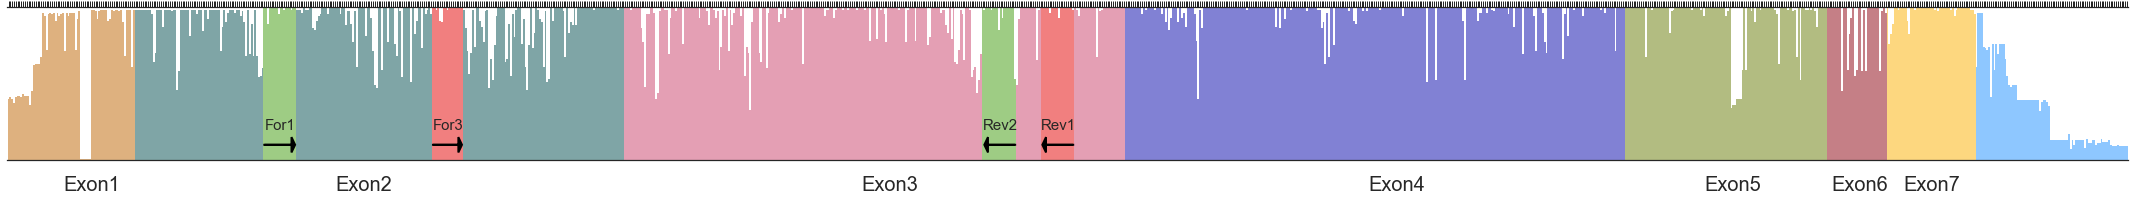

In [32]:

#fig, ax = matplotlib.pyplot(figsize=(25, 4))
fig, ax = matplotlib.pyplot.subplots(figsize=(30, 3))
plot_color(ax, score_df, start=31, end=1200)
#plot_color(ax[1], score_df, start=631, end=1071)
ax.arrow(141, 10, 15, 0, head_width=10, linewidth=2, head_length=2, fc='k', ec='k')
ax.text(141, 20, 'For1', fontsize=15)
ax.arrow(555, 10, -15, 0, head_width=10, linewidth=2, head_length=2, fc='k', ec='k')
ax.text(537, 20, 'Rev2', fontsize=15)
ax.arrow(234, 10, 14, 0, head_width=10, linewidth=2, head_length=2, fc='k', ec='k')
ax.text(234, 20, 'For3', fontsize=15)
ax.arrow(587, 10, -15, 0, head_width=10, linewidth=2, head_length=2, fc='k', ec='k')
ax.text(569, 20, 'Rev1', fontsize=15)
ax.text(30, -20, 'Exon1', fontsize=20)
ax.text(180, -20, 'Exon2', fontsize=20)
ax.text(470, -20, 'Exon3', fontsize=20)
ax.text(750, -20, 'Exon4', fontsize=20)
ax.text(935, -20, 'Exon5', fontsize=20)
ax.text(1005, -20, 'Exon6', fontsize=20)
ax.text(1045, -20, 'Exon7', fontsize=20)
red_patch = mpatches.Patch(color='red', label='The red data')
#ax[2].legend(handles=[red_patch])
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.subplots_adjust(bottom=0.2)
fig.savefig("PrimerLocation.png", dpi=300)
fig.savefig("PrimerLocation.pdf")